In [1]:
cd /Users/joepalmo/Desktop/cfa/SDU-preproc

/Users/joepalmo/Desktop/cfa/SDU-preproc


In [2]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from astropy.io import ascii
import os

# open source module found for converting MJD/JD to DateTimes
import jdutil as jd

# Ben's module -- THANKS BEN
import LCtools

# my preprocessing module
from preproc import *

import glob


In [20]:
# specify path to the lightcurve and spectrum
lc_path = "FKComaeBerenices/vimag2.dat"

spec1_path = "FKComaeBerenices/2450545.8.dat"
spec2_path = "FKComaeBerenices/2450546.7.dat"
spec3_path = "FKComaeBerenices/2450547.7.dat"
spec4_path = "FKComaeBerenices/2450549.8.dat"

# object name (or abbreviation)
n = "FKCom"

# resample length for time-sorted LC purposes
resample_len = '7d'

# Time Sorted Light Curve

In [21]:
#load into pandas dataframes
lc = pd.read_csv(lc_path, delimiter="\s+")

In [22]:
lc['mjd'] = jd.jd_to_mjd(lc['HJD'])
lc.rename(columns={'Vmag':'mag'}, inplace=True)

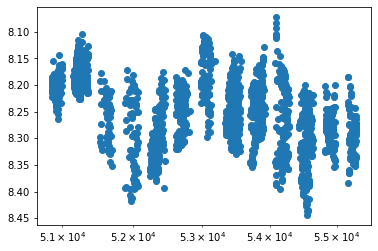

In [23]:
plt.scatter(lc['mjd'], lc['mag'])
plt.xscale('log')
plt.gca().invert_yaxis()

In [24]:
print("The observations span",str(round(lc.mjd.max()-lc.mjd.min(), 2)),"days")

The observations span 4446.96 days


In [25]:
time_preproc_lc = LC_timesort_preproc(lc, resample_len=resample_len)

In [26]:
time_preproc_lc = time_preproc_lc[time_preproc_lc['Modified Julian Day'].between(50500,53000)]

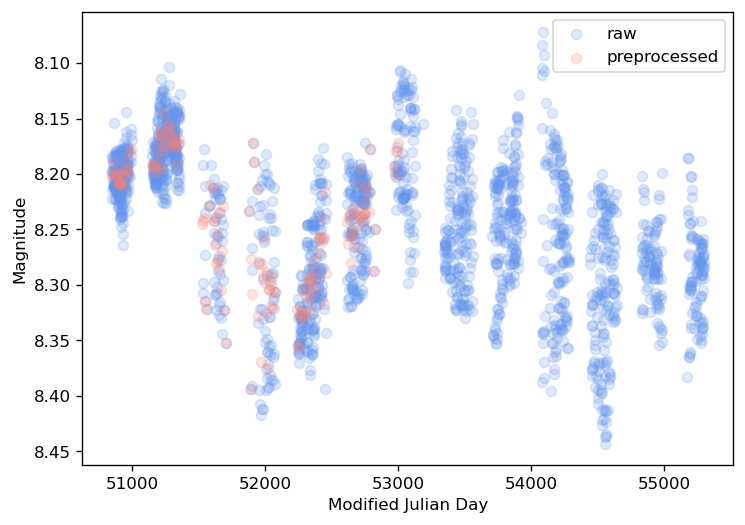

In [27]:
fig1 = plot_timesort(lc, time_preproc_lc)

In [28]:
len(time_preproc_lc)

308

In [29]:
len(time_preproc_lc.dropna())

159

In [30]:
# The average data play rate determined empirically from sonoUno is about 
# 8.5 data rows played per second. Therefore:
print("Estimated video time of "+ str(len(time_preproc_lc) / 8.5), "s")

Estimated video time of 36.23529411764706 s


# Spectra

In [31]:
spec1 = pd.read_csv(spec1_path, delimiter='\s+', names=['wavelength', 'flux'])
spec2 = pd.read_csv(spec2_path, delimiter='\s+', names=['wavelength', 'flux'])
spec3 = pd.read_csv(spec3_path, delimiter='\s+', names=['wavelength', 'flux'])
spec4 = pd.read_csv(spec4_path, delimiter='\s+', names=['wavelength', 'flux'])

In [32]:
spec1

,wavelength,flux
0,6400.000000,0.934249
1,6400.103691,0.933437
2,6400.207383,0.929217
3,6400.311074,0.930586
4,6400.414766,0.931276
...,...,...
2407,6649.585233,0.997005
2408,6649.688925,0.999467
2409,6649.792616,1.001171
2410,6649.896308,1.002393


In [33]:
preproc_spec1 = spectra_preproc(spec1, bins=np.arange(6500,6650,1))
preproc_spec2 = spectra_preproc(spec2, bins=np.arange(6500,6650,1))
preproc_spec3 = spectra_preproc(spec3, bins=np.arange(6500,6650,1))
preproc_spec4 = spectra_preproc(spec4, bins=np.arange(6500,6650,1))

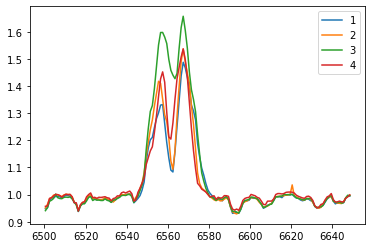

In [34]:
fig, ax = plt.subplots()
#ax.set_xlim(6540, 6600)
ax.plot(preproc_spec1['Wavelength'], preproc_spec1['Flux'], label='1')
ax.plot(preproc_spec2['Wavelength'], preproc_spec2['Flux'], label='2')
ax.plot(preproc_spec3['Wavelength'], preproc_spec3['Flux'], label='3')
ax.plot(preproc_spec4['Wavelength'], preproc_spec4['Flux'], label='4')
plt.legend()

In [35]:
len(preproc_spec1) / 8.5

17.529411764705884

# Save Preprocessed Files

In [36]:
#create output directory
outdir = 'preproc/{}/'.format(n)
if not os.path.exists(outdir):
    os.makedirs(outdir)   

In [37]:
#save preprocessed files
time_preproc_lc.to_csv("preproc/{}/{}_LC_timesort.csv".format(n,n), index=False)
preproc_spec1.to_csv("preproc/{}/{}_spec1.csv".format(n,n), index=False)
preproc_spec2.to_csv("preproc/{}/{}_spec2.csv".format(n,n), index=False)
preproc_spec3.to_csv("preproc/{}/{}_spec3.csv".format(n,n), index=False)
preproc_spec4.to_csv("preproc/{}/{}_spec4.csv".format(n,n), index=False)